# Assignment 4_160204093_K Nearest Neighbors Classifier

Read file from gdrive

In [1]:
import numpy as np
from google.colab import drive
drive.mount('/content/gdrive')
# change working directory on the drive
%cd '/content/gdrive/My Drive/Data/'

# read train.txt file line by line
with open('train_knn.txt', "r") as train:
    FileasList = train.read().splitlines()

# split the string and store it into another list classwise
train = []
train_x = []
train_y = []
train_cls = []
train_x1 = []
train_y1 = []
train_x2 = []
train_y2 = []
for i in range(len(FileasList)):
  train.append(FileasList[i].split(","))
  train_x.append(int(train[i][0]))
  train_y.append(int(train[i][1]))
  train_cls.append(int(train[i][2]))

  if(train[i][2] == '1'):
    train_x1.append(int(train[i][0]))
    train_y1.append(int(train[i][1]))
  else:
    train_x2.append(int(train[i][0]))
    train_y2.append(int(train[i][1]))

# read test.txt file line by line
with open('test_knn.txt', "r") as test:
    FileasList = test.readlines()

# split the string and store it into another list
test = []
test_x = []
test_y = []
test_class = []
for i in range(len(FileasList)):
  test.append(FileasList[i].split(","))
  test_x.append(int(test[i][0]))
  test_y.append(int(test[i][1]))


Mounted at /content/gdrive
/content/gdrive/My Drive/Data


In [2]:
import numpy as np

train_x1 = np.array(train_x1)
train_y1 = np.array(train_y1)
train_x2 = np.array(train_x2)
train_y2 = np.array(train_y2)
test_x = np.array(test_x)
test_y = np.array(test_y)
train = np.array(train)


Plotting all sample points from train data 

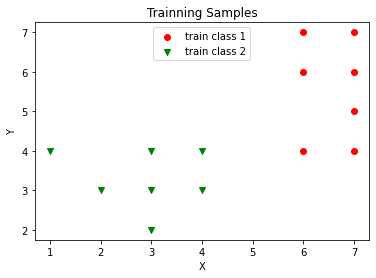

In [11]:
import matplotlib.pyplot as plt

plt.scatter(train_x1, train_y1, c = 'r', marker = 'o', label = 'train class 1')
plt.scatter(train_x2, train_y2, c = 'g', marker = 'v', label = 'train class 2')
plt.title("Trainning Samples")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend(loc = 'upper center')


**KNN Calculation**

In [4]:
def knn(k,x,y):
  x = np.full_like(train_x, x)
  y = np.full_like(train_y,y)
  dis = (train_x - x)**2 + (train_y - y)**2
  dis = np.stack((dis,train_cls), axis = 1)
  dis = sorted(dis, key=lambda x : x[0])
  dis = dis[:k]
  c1 = 0
  c2 = 0
  pred_cls = 0
  for j in range(k):
    if(dis[j][1] == 1):
      c1 = c1 + 1
    else:
      c2 = c2 + 1
  if(c1 > c2):
    pred_cls = 1
  else:
    pred_cls = 2

  return dis,pred_cls

Classifying test points and plotting them according to the predicted class label

Enter the value of K:3


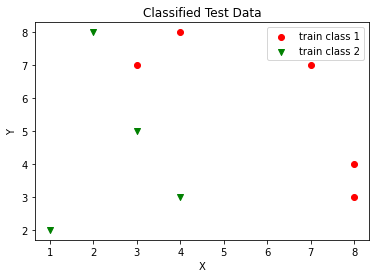

In [34]:
k = int(input('Enter the value of K:'))
test_class = []
test_x1 = []
test_y1 = []
test_x2 = []
test_y2 = []

for i in range(len(test_x)):
  dis,pred_cls = knn(k,test_x[i],test_y[i])
  test_class.append(pred_cls)

for i in range(len(test_class)):
  if(test_class[i] == 1):
    test_x1.append(test_x[i])
    test_y1.append(test_y[i])
  else:
    test_x2.append(test_x[i])
    test_y2.append(test_y[i])

plt.scatter(test_x1, test_y1, c = 'r', marker = 'o', label = 'train class 1')
plt.scatter(test_x2, test_y2, c = 'g', marker = 'v', label = 'train class 2')
plt.title("Classified Test Data")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend(loc = 'upper right')

Writing a file to analysis the output

In [33]:
file = open("prediction.txt", "w")
for i in range(len(test_x)):
  dis,pred_cls = knn(k,test_x[i],test_y[i])

  file.write("\nTest Points: " + str(test_x[i]) + "," + str(test_y[i]) + "\n")
  for j in range(k):
    file.write("Distance " + str(j+1) + ":" + str(dis[j][0]) + "\tClass: " + str(dis[j][1]) + "\n")
  file.write("Predicted Class: " + str(pred_cls) + "\n")
file.close()

with open('prediction.txt', "r") as pred:
    FileasList = pred.read().splitlines()
for data in FileasList:
  print(data)


Test Points: 3,7
Distance 1:9	Class: 1
Distance 2:9	Class: 2
Distance 3:10	Class: 1
Predicted Class: 1

Test Points: 7,7
Distance 1:0	Class: 1
Distance 2:1	Class: 1
Distance 3:1	Class: 1
Predicted Class: 1

Test Points: 4,3
Distance 1:0	Class: 2
Distance 2:1	Class: 2
Distance 3:1	Class: 2
Predicted Class: 2

Test Points: 2,8
Distance 1:17	Class: 1
Distance 2:17	Class: 2
Distance 3:17	Class: 2
Predicted Class: 2

Test Points: 3,5
Distance 1:1	Class: 2
Distance 2:2	Class: 2
Distance 3:4	Class: 2
Predicted Class: 2

Test Points: 1,2
Distance 1:2	Class: 2
Distance 2:4	Class: 2
Distance 3:4	Class: 2
Predicted Class: 2

Test Points: 4,8
Distance 1:5	Class: 1
Distance 2:8	Class: 1
Distance 3:10	Class: 1
Predicted Class: 1

Test Points: 8,3
Distance 1:2	Class: 1
Distance 2:5	Class: 1
Distance 3:5	Class: 1
Predicted Class: 1

Test Points: 8,4
Distance 1:1	Class: 1
Distance 2:2	Class: 1
Distance 3:4	Class: 1
Predicted Class: 1
